# Are vars mixed up time intervals? Lets sort it out!

Lately, I was gazing at the beatiful graphs created by Chris Deotte here:
https://www.kaggle.com/cdeotte/modified-naive-bayes-santander-0-899/notebook

..and noticed that they look like mixed up cartoon frames. They have similar pattern, proportions, but they are just mixed up, on different scale and sometimes flipped. So I have cleaned it up; here is the result. 

# The list of columns that have to be reversed
If you take a look at the orginal graphs by Chris Deotte, notice how similar the probability graphs are. But some are directed to the right, while others are directed to the left. We will flip the graphs with the higest probabilty on the right. And we'll bring everything to one scale to make similarities more pronounced.

In [1]:
reverse_list = [0,1,2,3,4,5,6,7,8,11,15,16,18,19,
                22,24,25,26,27,41,29,
                32,35,37,40,48,49,47,
                55,51,52,53,60,61,62,103,65,66,67,69,
                70,71,74,78,79,
                82,84,89,90,91,94,95,96,97,99,
                105,106,110,111,112,118,119,125,128,
                130,133,134,135,137,
                140,144,145,147,151,155,157,159,
                161,162,163,164,167,168,
                170,171,173,175,176,179,
                180,181,184,185,187,189,
                190,191,195,196,199]

# Load data

In [2]:
import numpy as np, pandas as pd
train_file = '../input/train.csv'
test_file = '../input/test.csv'

train = pd.read_csv(train_file, index_col='ID_code')
X_test = pd.read_csv(test_file, index_col='ID_code')

In [3]:
y_train = train.iloc[:,0]
X_train = train.iloc[:,1:]

In [4]:
X_all = pd.concat([X_test, X_train])

# Scale and flip
I doubt that standard scaler is the correct way to restore the original scale for the frames. But alternatives looked even worse.

In [5]:
from sklearn.preprocessing import StandardScaler

x = X_all.values #returns a numpy array
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_all = pd.DataFrame(x_scaled).set_index(X_all.index)

In [6]:
X_all.loc[:,reverse_list] = X_all.loc[:,reverse_list]*-1

In [7]:
X_all.columns = X_train.columns

In [8]:
test = X_all.loc[X_test.index,:].reset_index(drop=True)
train = X_all.loc[X_train.index,:].reset_index(drop=True)

In [9]:
train0 = train[y_train.values==0].copy()
train1 = train[y_train.values==1].copy()

# Statistical Functions
Below are functions to calcuate various statistical things.

In [10]:
# CALCULATE MEANS AND STANDARD DEVIATIONS
s = [0]*200
m = [0]*200
for i in range(200):
    s[i] = np.std(train['var_'+str(i)])
    m[i] = np.mean(train['var_'+str(i)])
    
# CALCULATE PROB(TARGET=1 | X)
def getp(i,x):
    c = 3 #smoothing factor
    a = len( train1[ (train1['var_'+str(i)]>x-s[i]/c)&(train1['var_'+str(i)]<x+s[i]/c) ] ) 
    b = len( train0[ (train0['var_'+str(i)]>x-s[i]/c)&(train0['var_'+str(i)]<x+s[i]/c) ] )
    if a+b<500: return 0.1 #smoothing factor
    # RETURN PROBABILITY
    return a / (a+b)
    # ALTERNATIVELY RETURN ODDS
    # return a / b
    
# SMOOTH A DISCRETE FUNCTION
def smooth(x,st=1):
    for j in range(st):
        x2 = np.ones(len(x)) * 0.1
        for i in range(len(x)-2):
            x2[i+1] = 0.25*x[i]+0.5*x[i+1]+0.25*x[i+2]
        x = x2.copy()
    return x

# The frames: Display Target Density and Target Probability
As described by Chris: "Below are two plots for each of the 200 variables. The first is the density of `target=1` versus `target=0`. The second gives the probability that `target=1` given different values for `var_k`." 

Note how the shape and the range of graphs are consistnent. All we need to do is to sort them in the right order. Does not it remind you of the last Santander? I am pretty sure the correct order can be restored.

Showing vars 0 to 7 ...


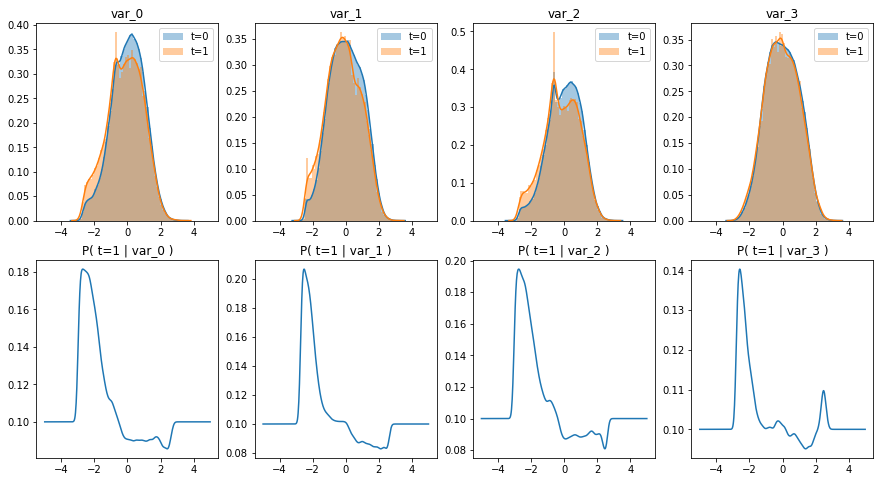

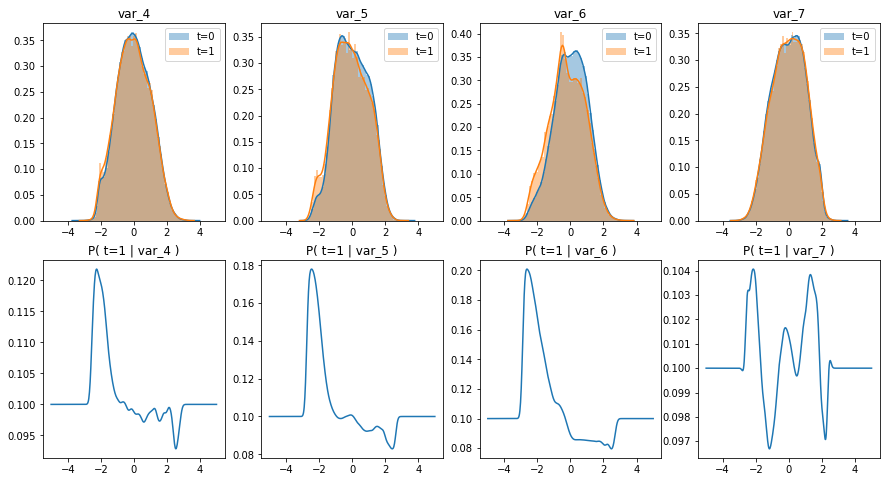

Showing vars 8 to 15 ...


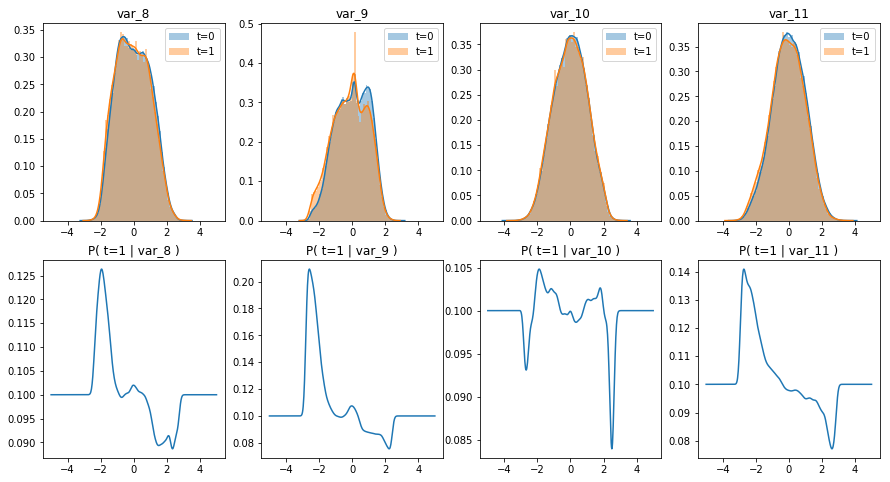

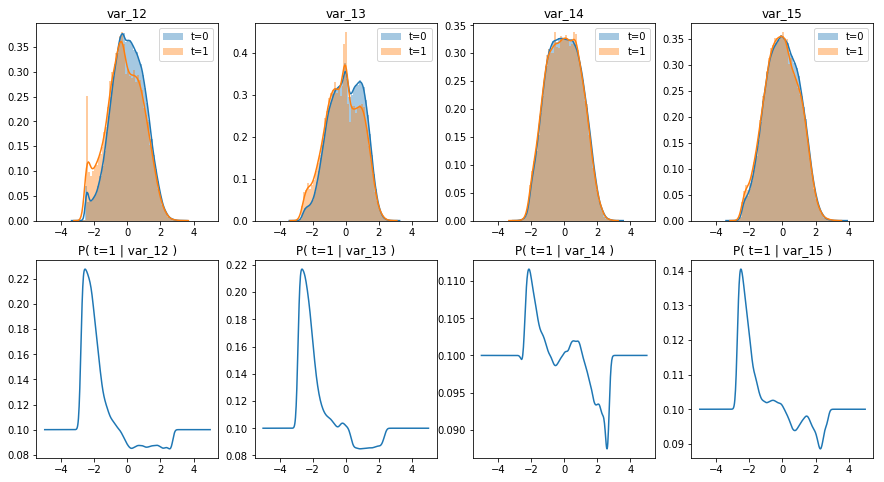

Showing vars 16 to 23 ...


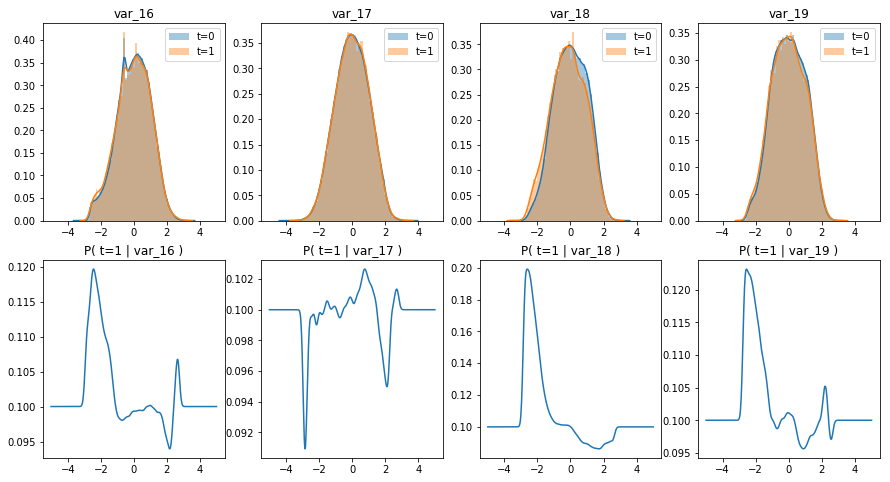

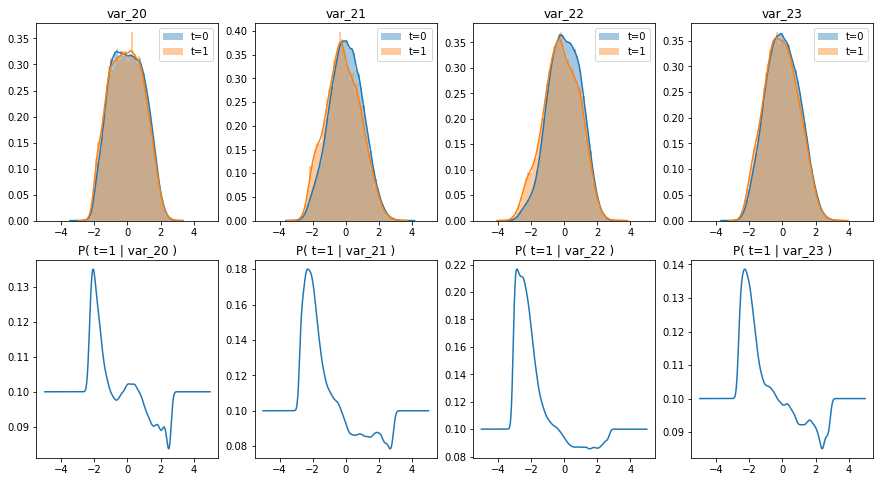

Showing vars 24 to 31 ...


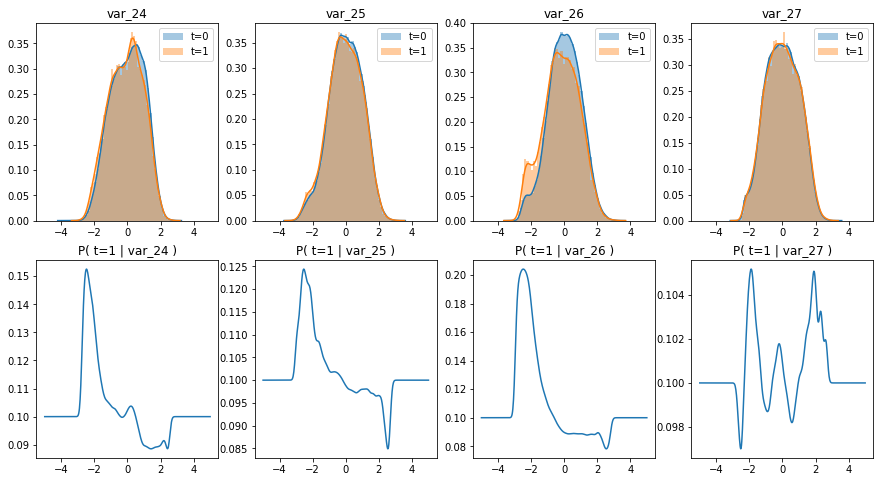

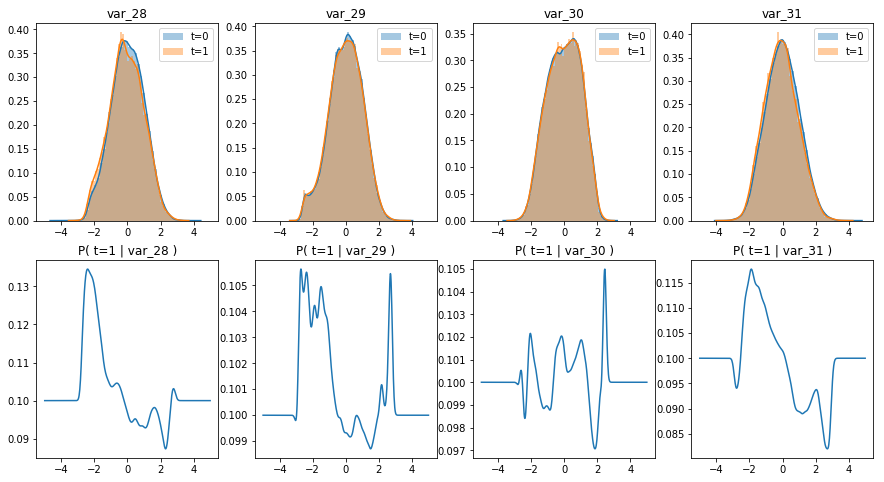

Showing vars 32 to 39 ...


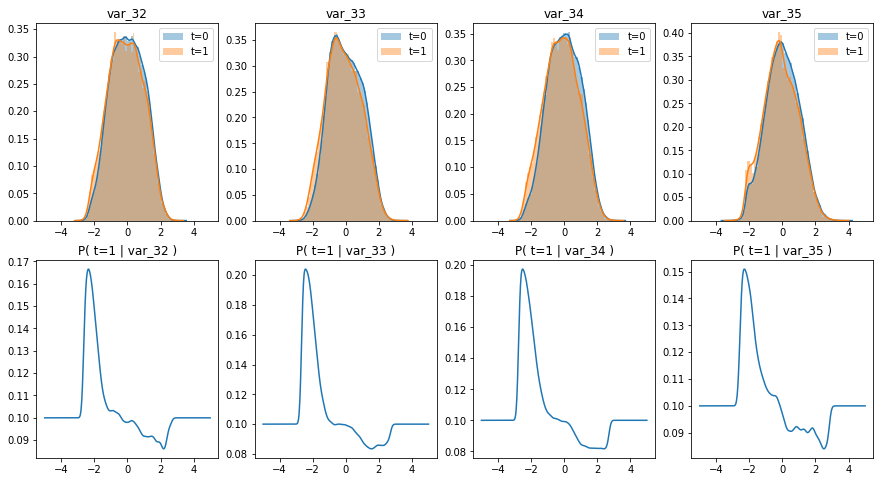

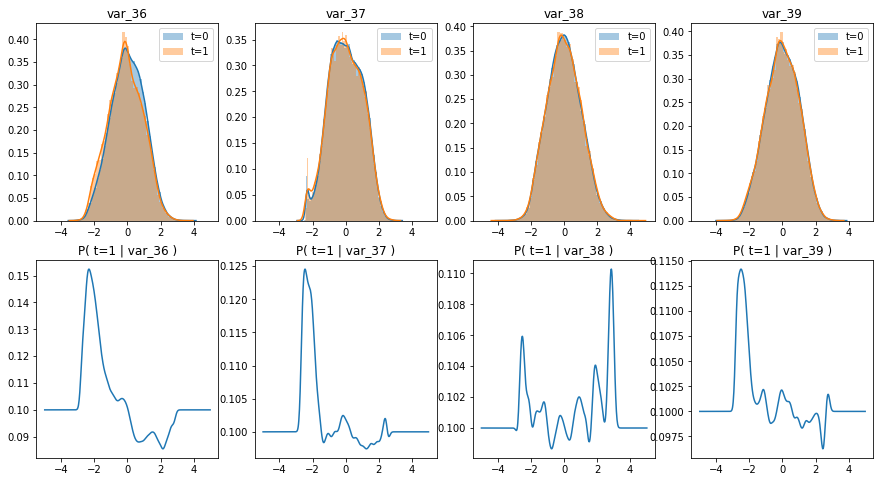

Showing vars 40 to 47 ...


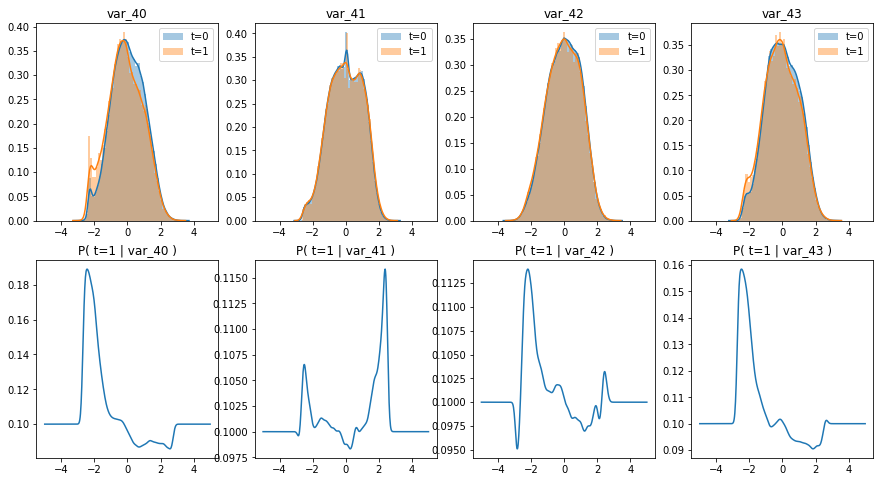

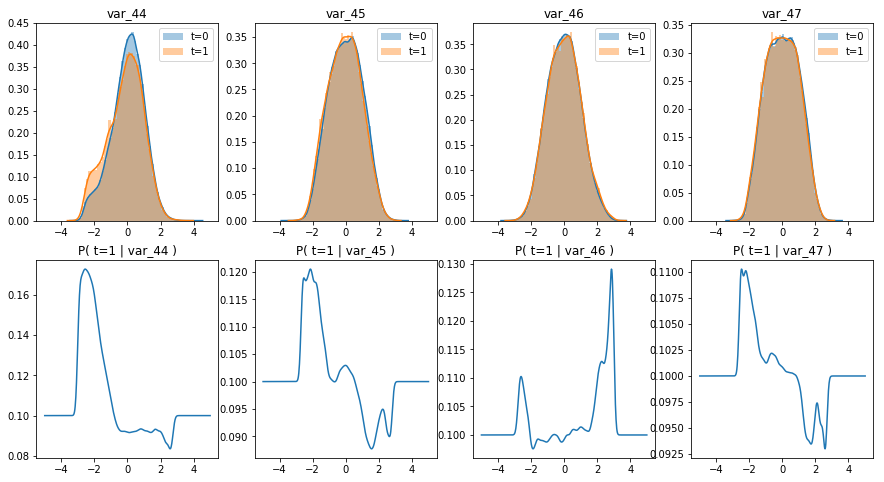

Showing vars 48 to 55 ...


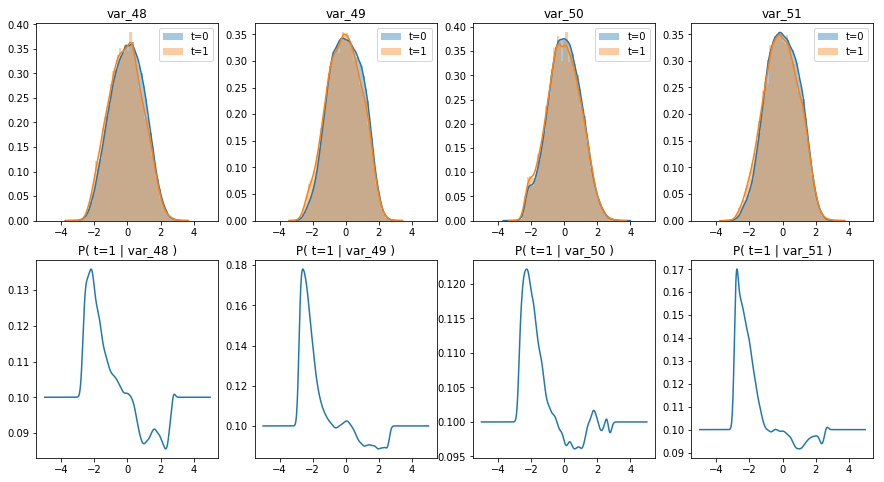

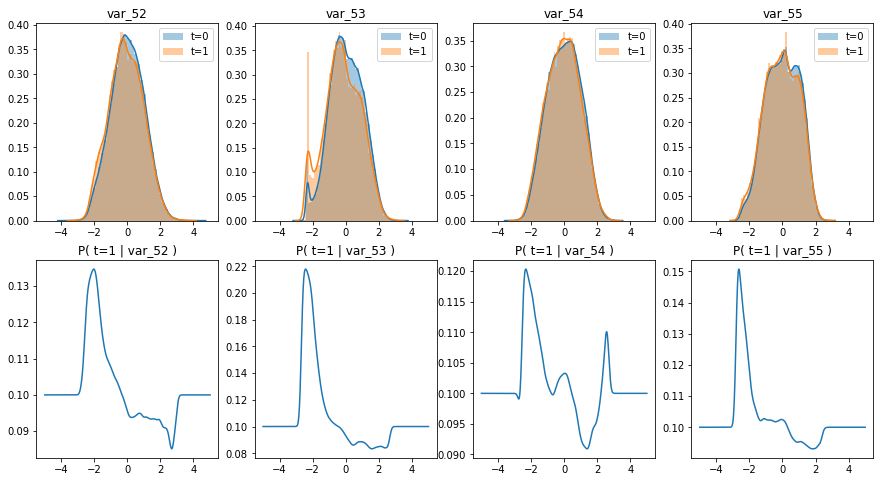

Showing vars 56 to 63 ...


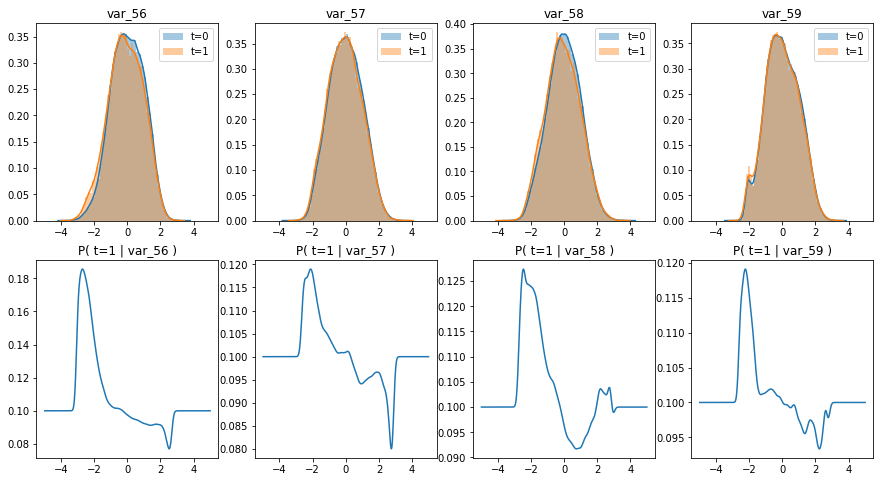

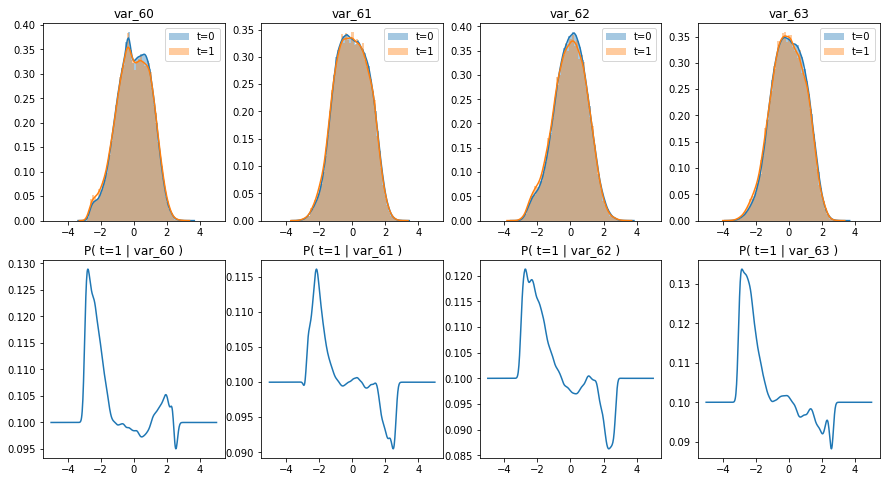

Showing vars 64 to 71 ...


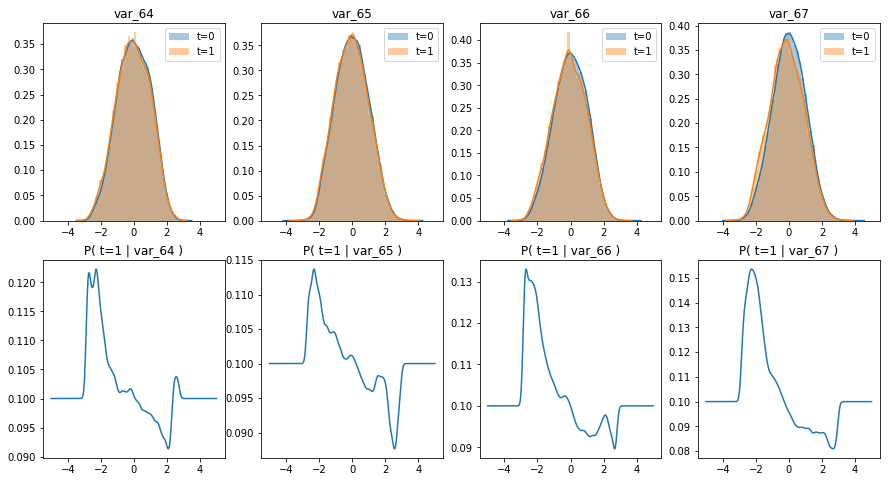

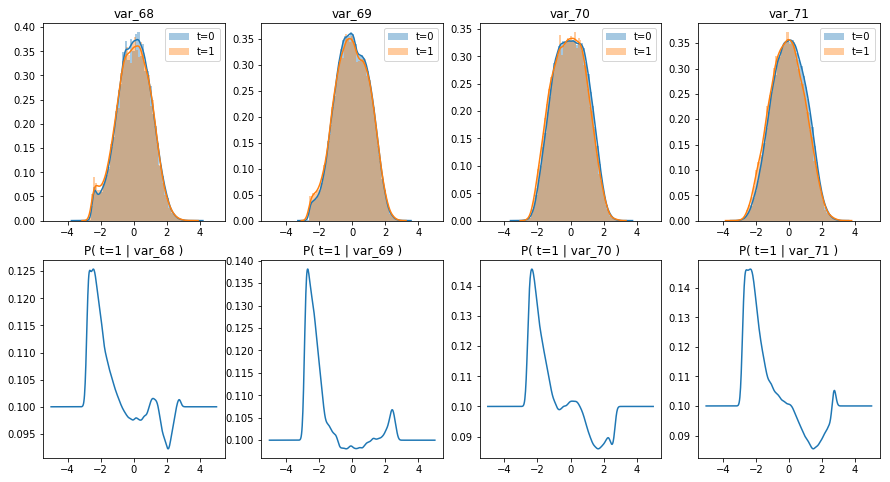

Showing vars 72 to 79 ...


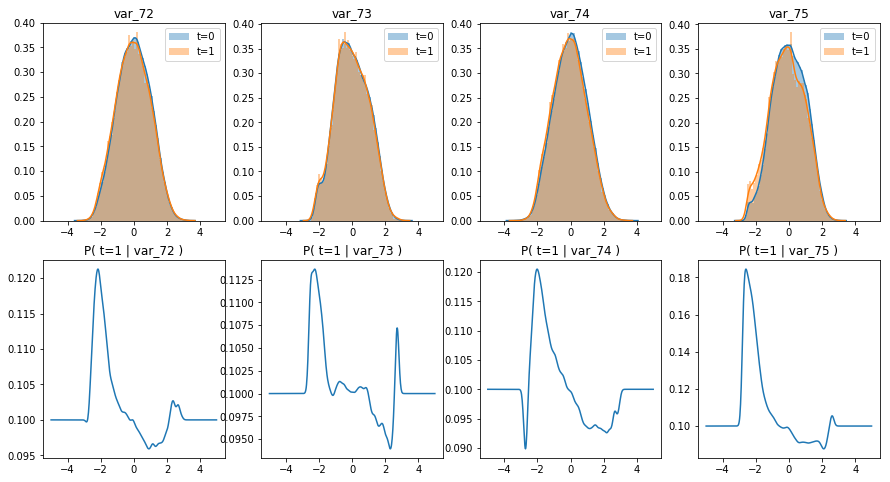

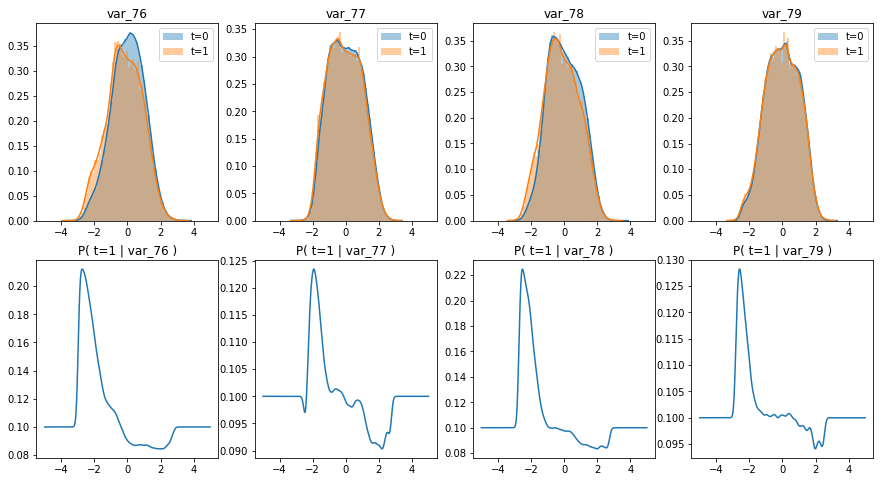

Showing vars 80 to 87 ...


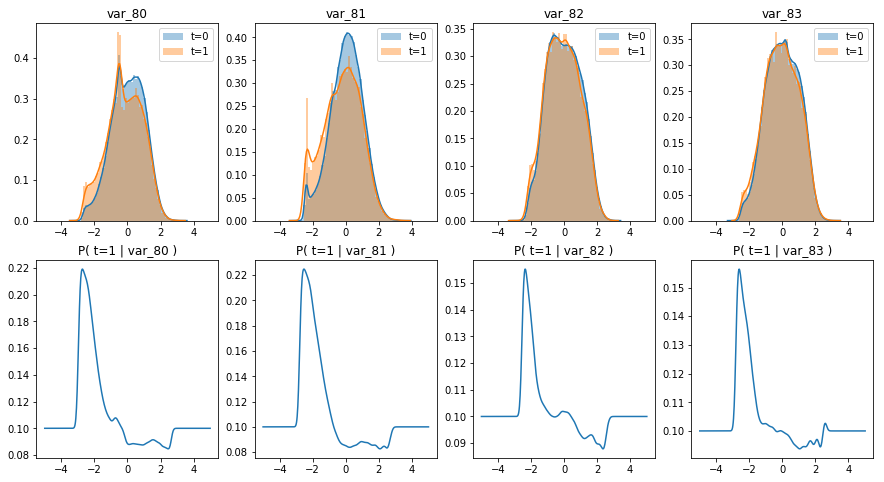

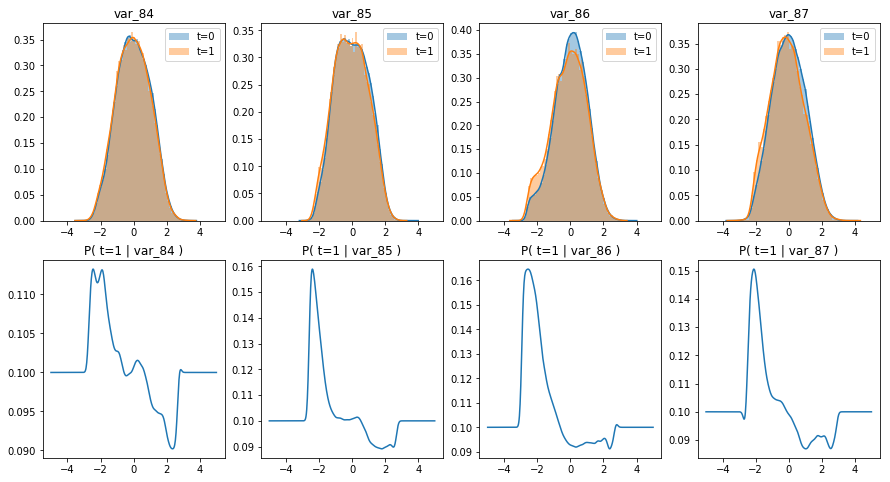

Showing vars 88 to 95 ...


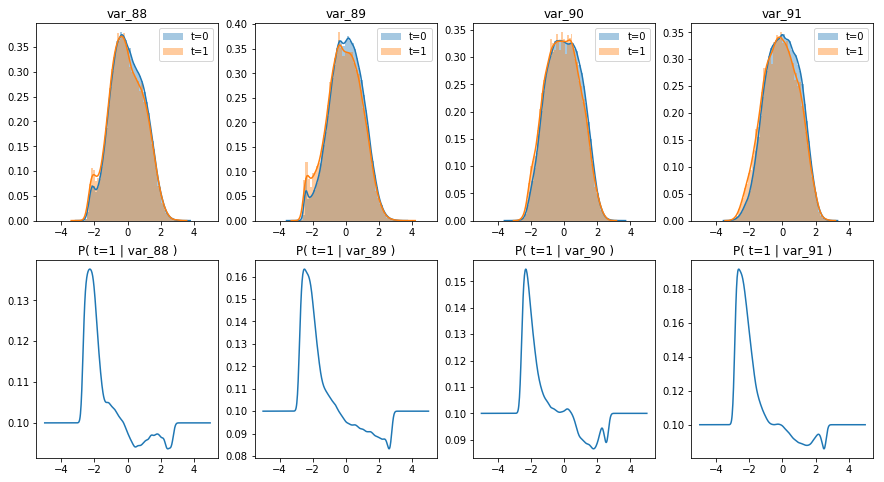

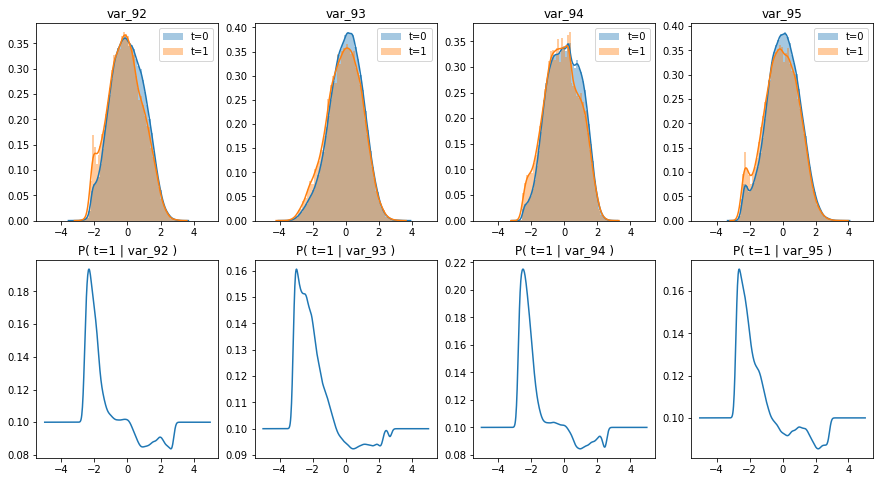

Showing vars 96 to 103 ...


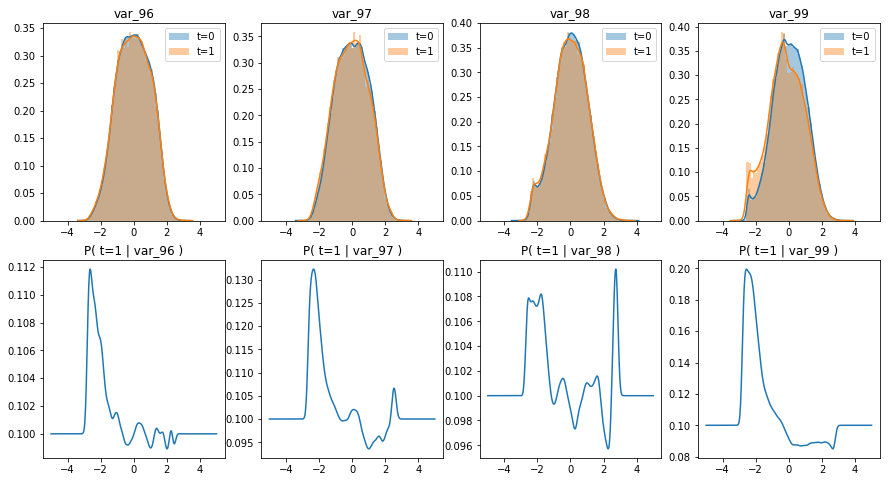

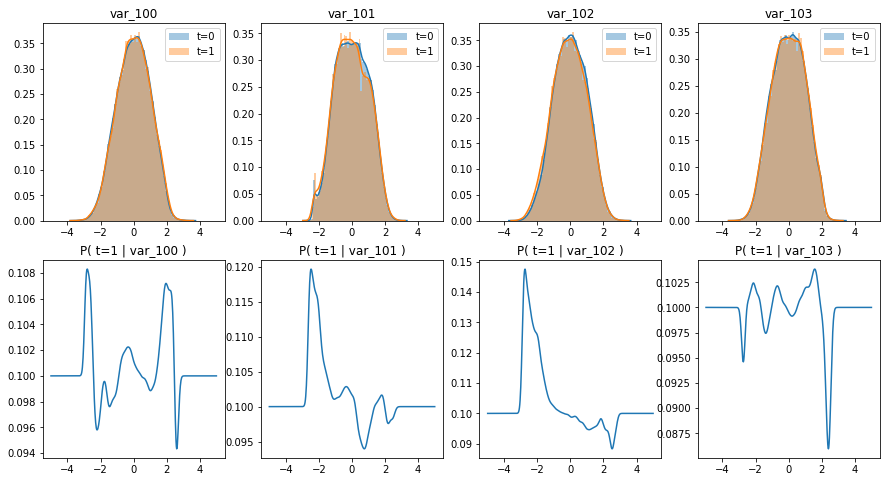

Showing vars 104 to 111 ...


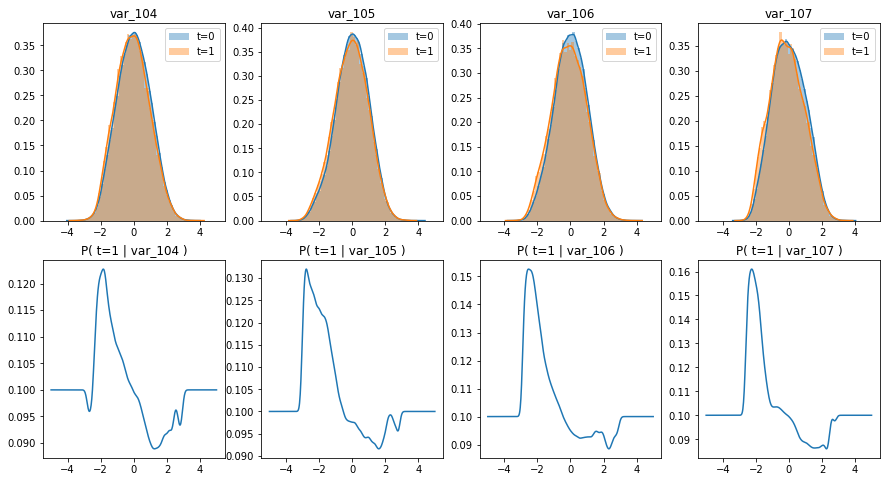

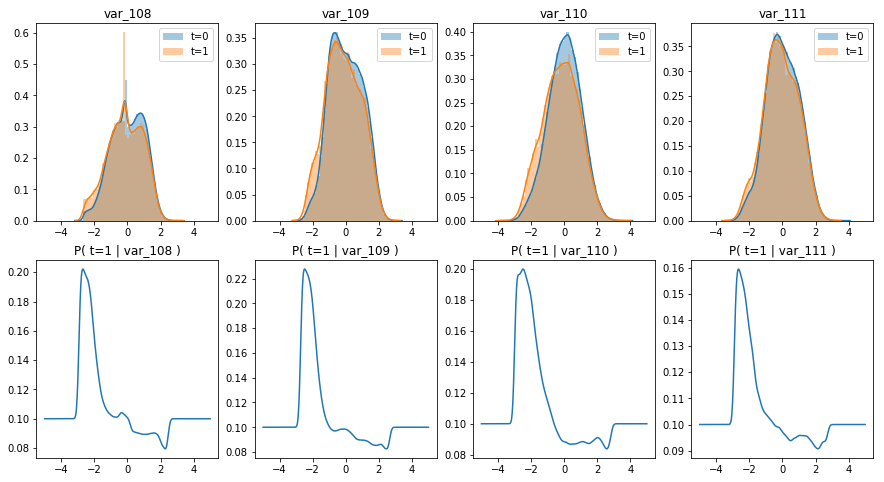

Showing vars 112 to 119 ...


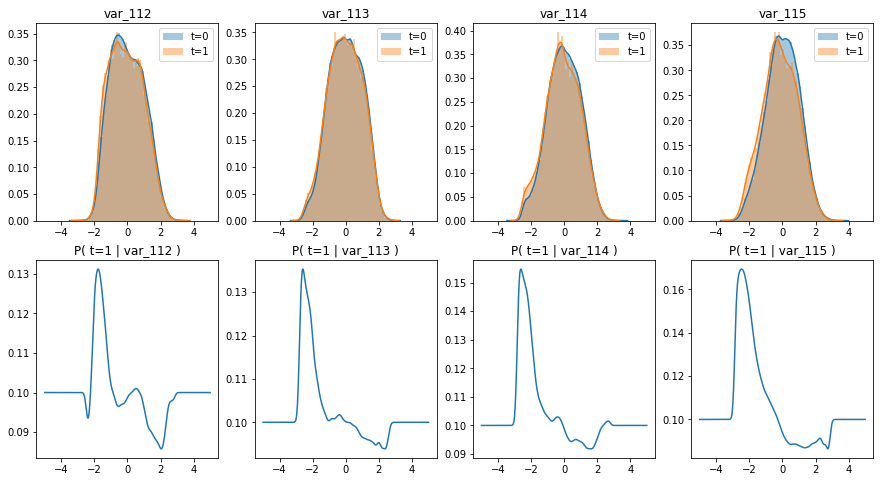

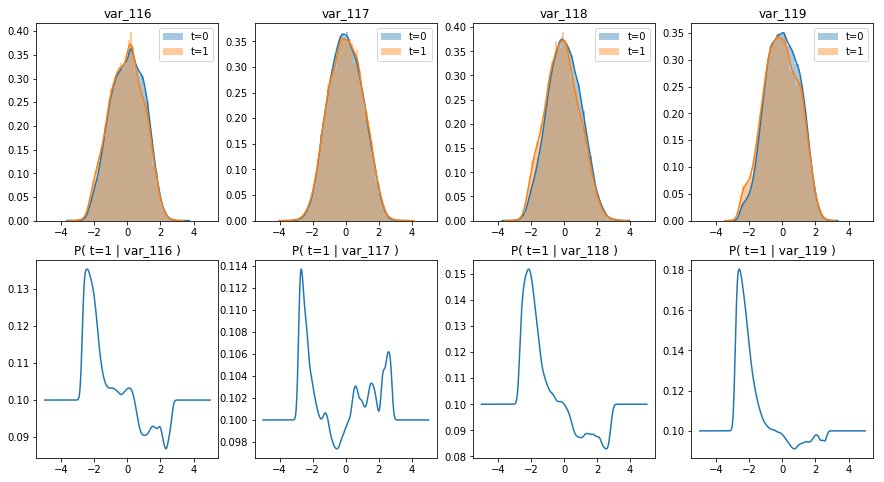

Showing vars 120 to 127 ...


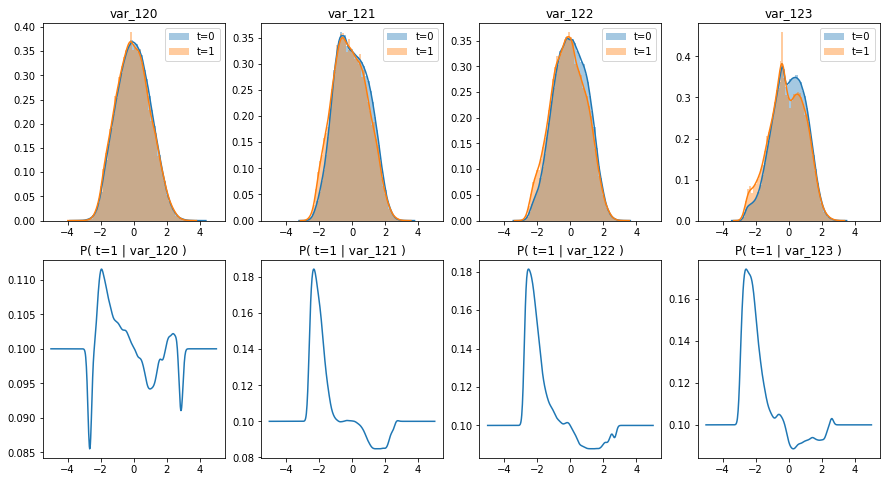

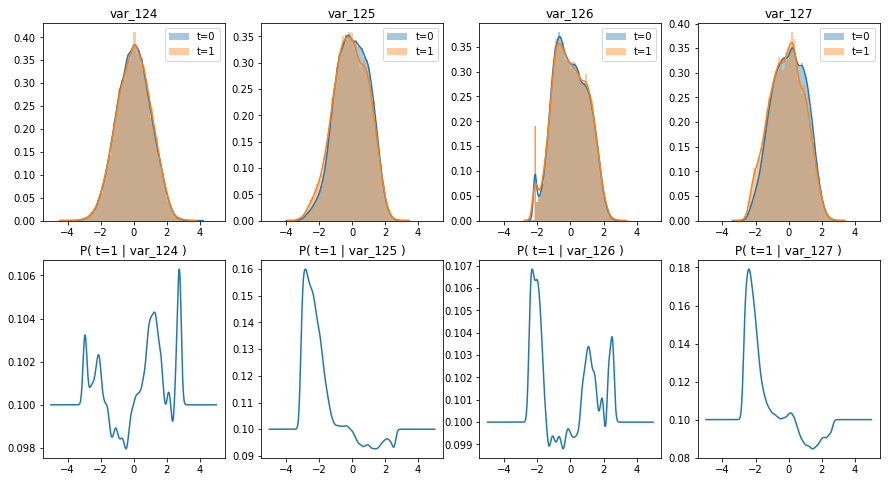

Showing vars 128 to 135 ...


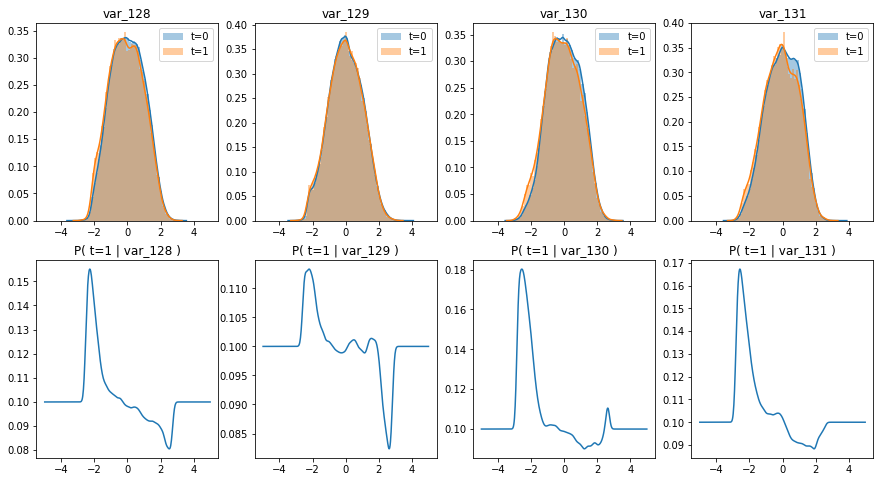

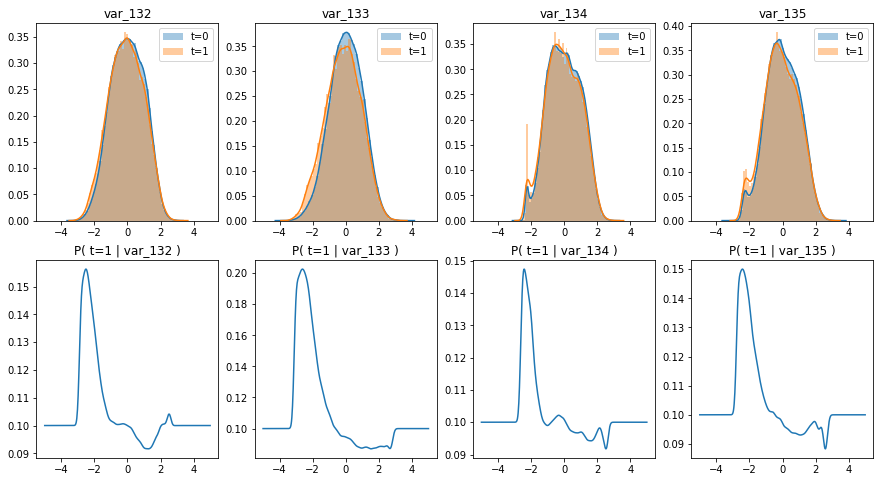

Showing vars 136 to 143 ...


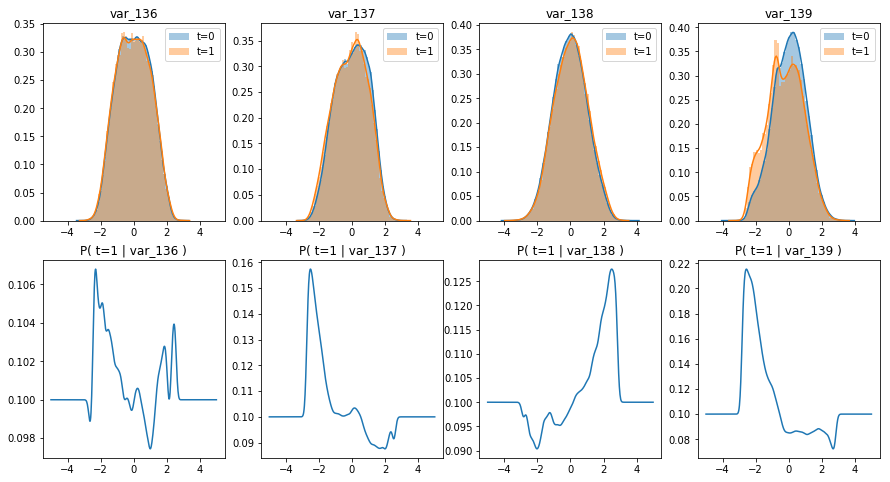

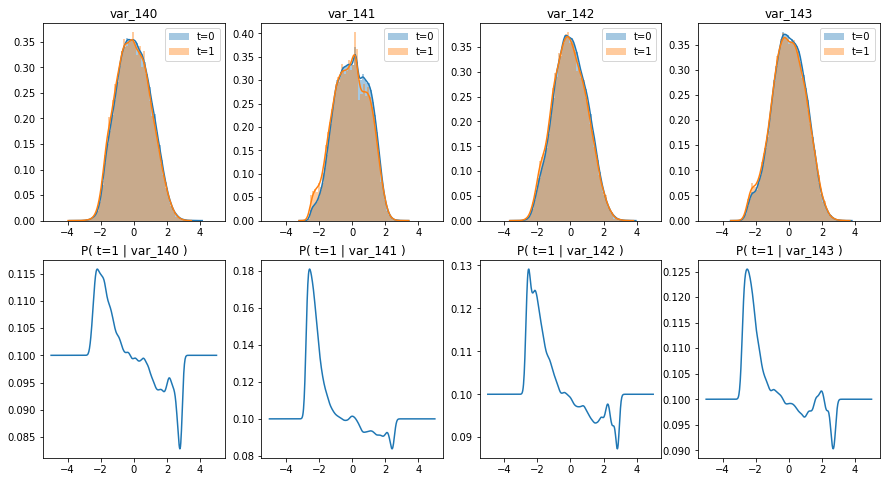

Showing vars 144 to 151 ...


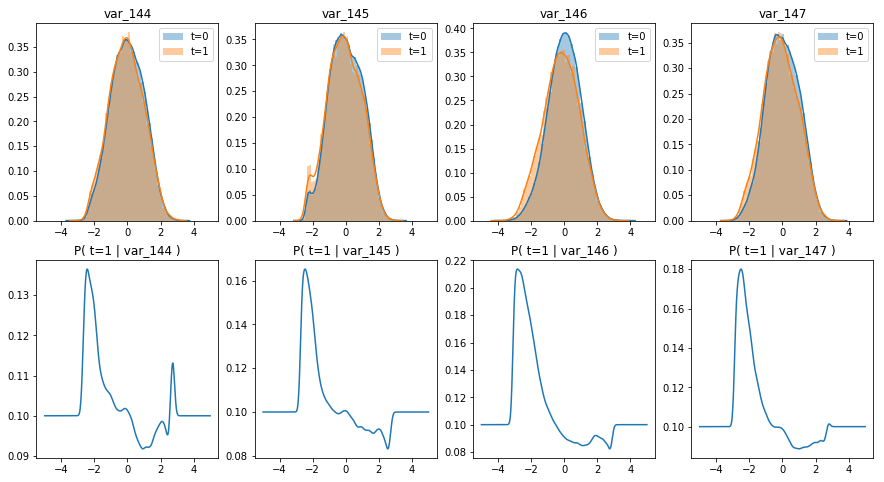

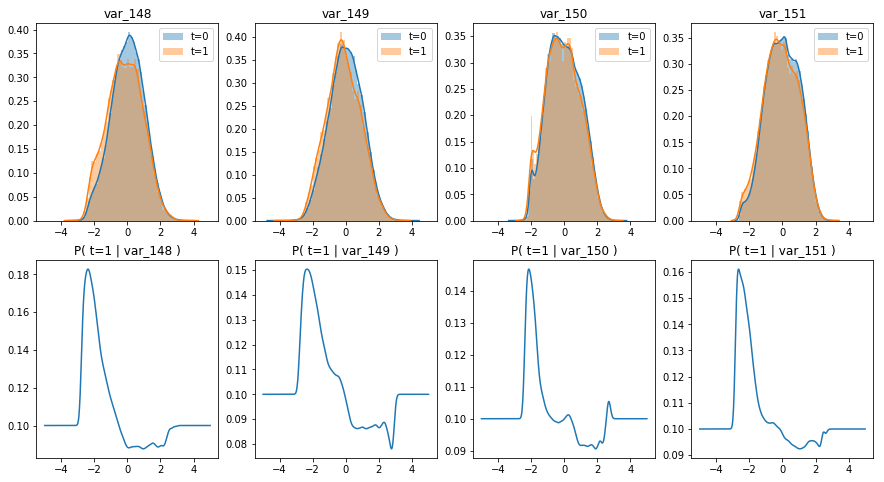

Showing vars 152 to 159 ...


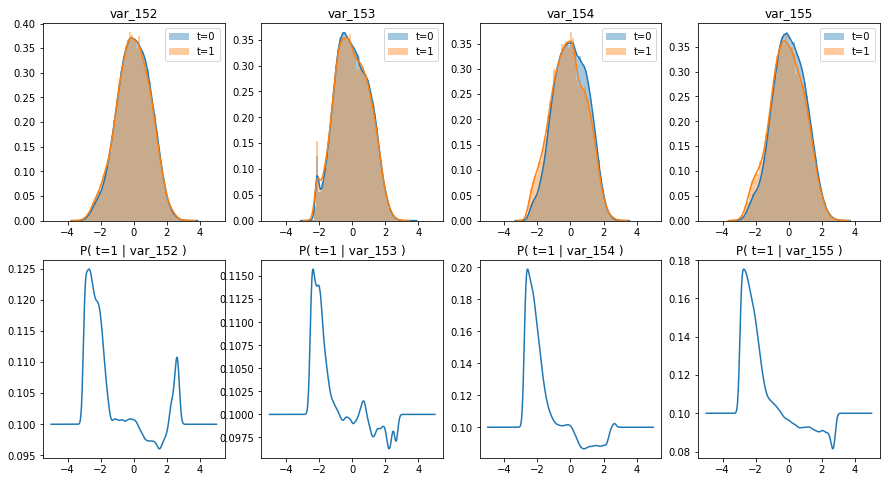

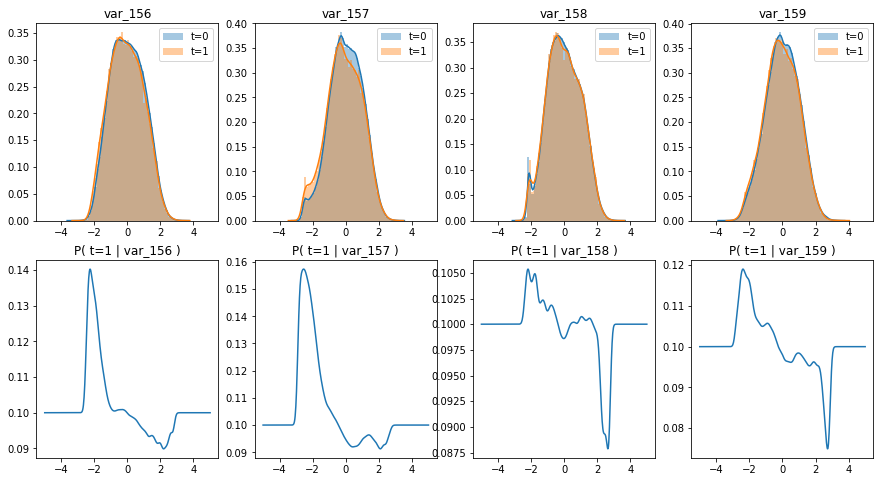

Showing vars 160 to 167 ...


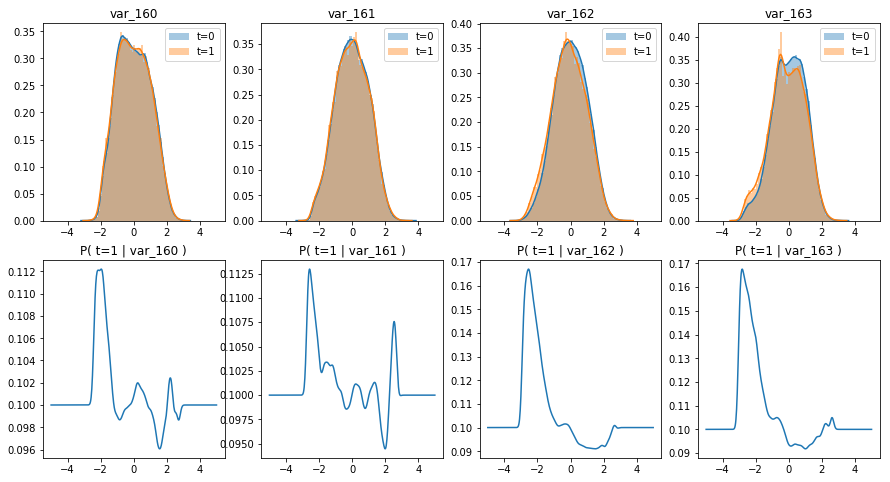

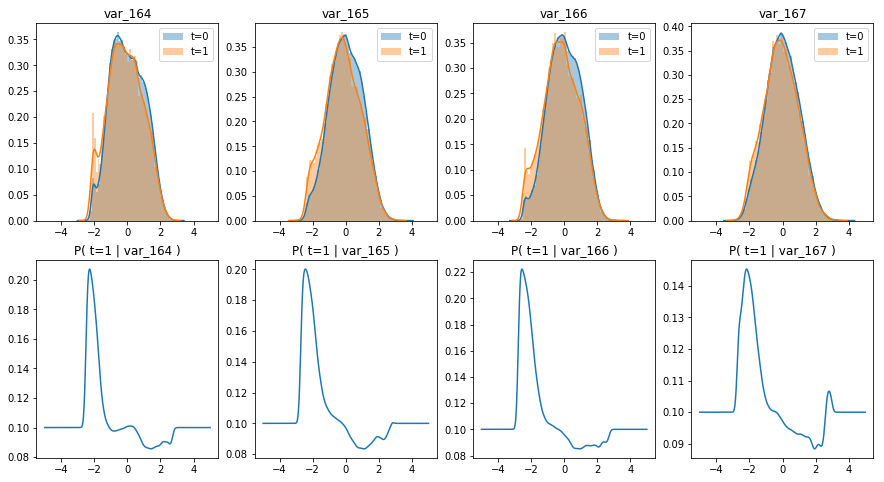

Showing vars 168 to 175 ...


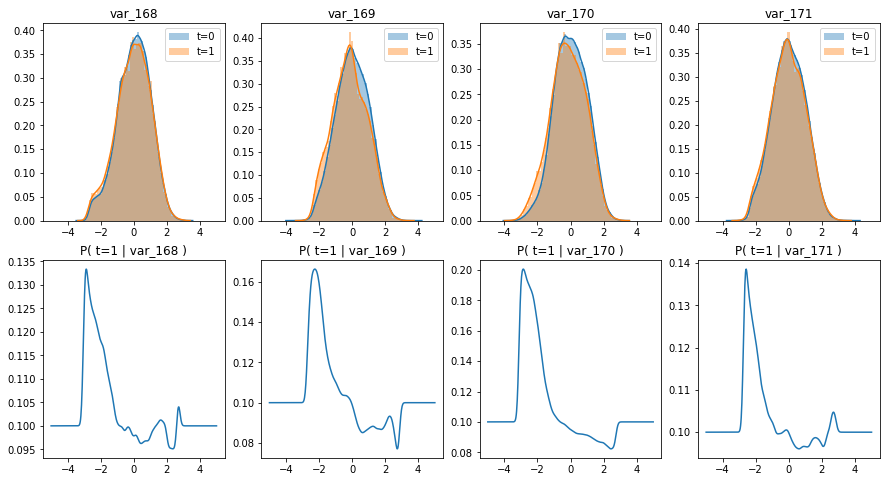

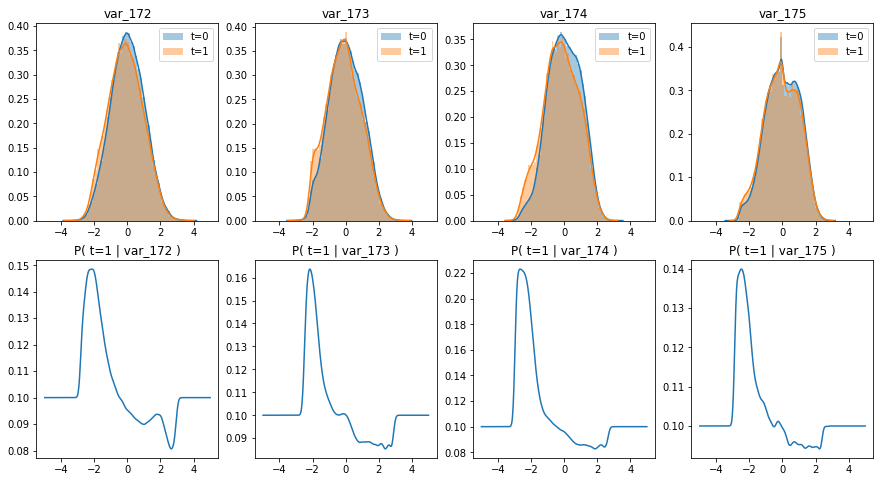

Showing vars 176 to 183 ...


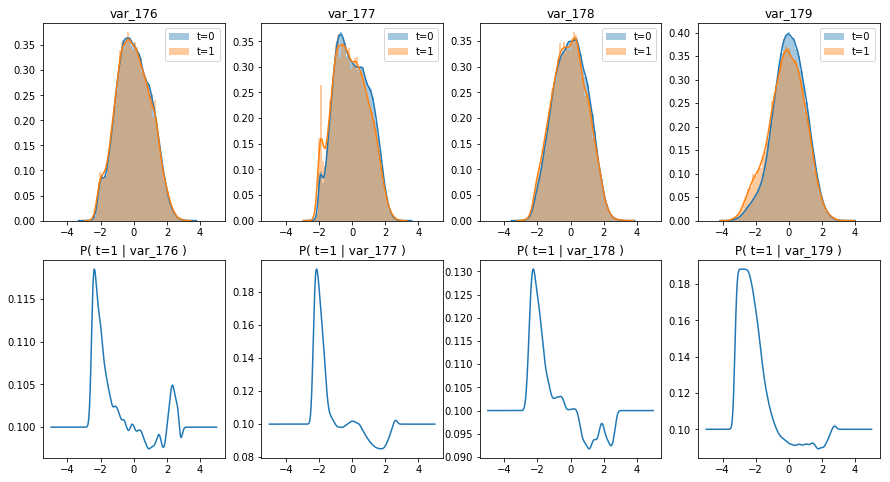

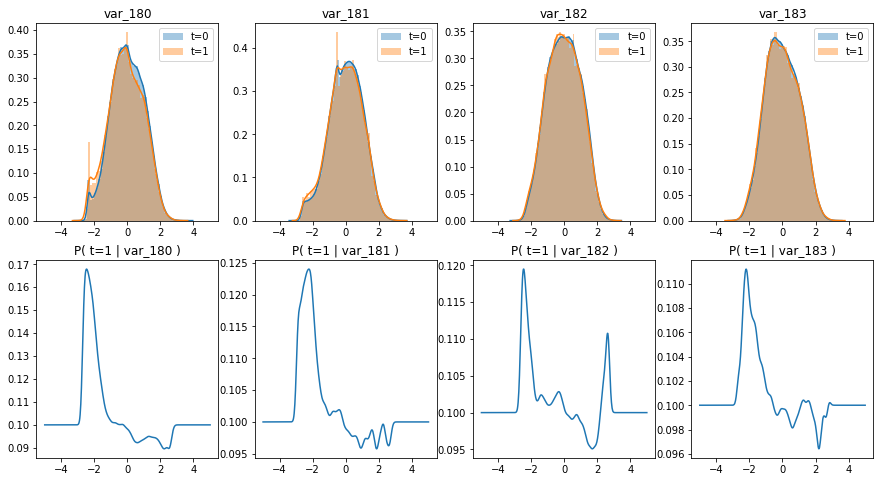

Showing vars 184 to 191 ...


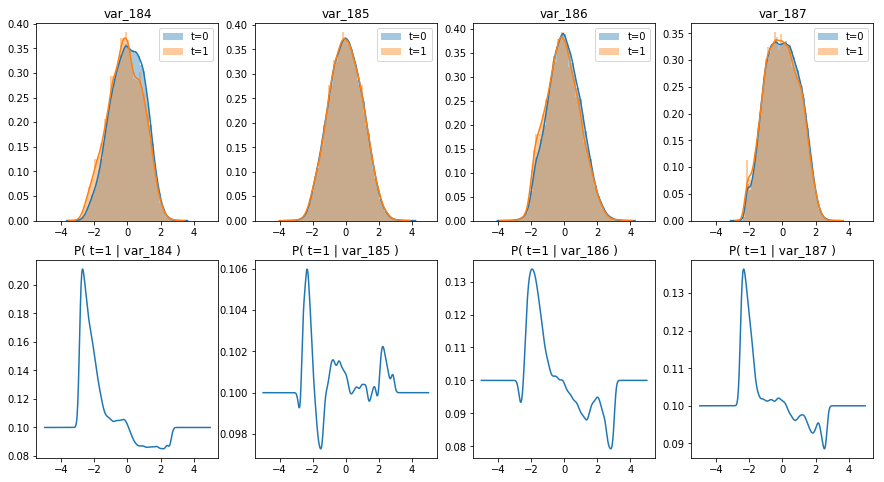

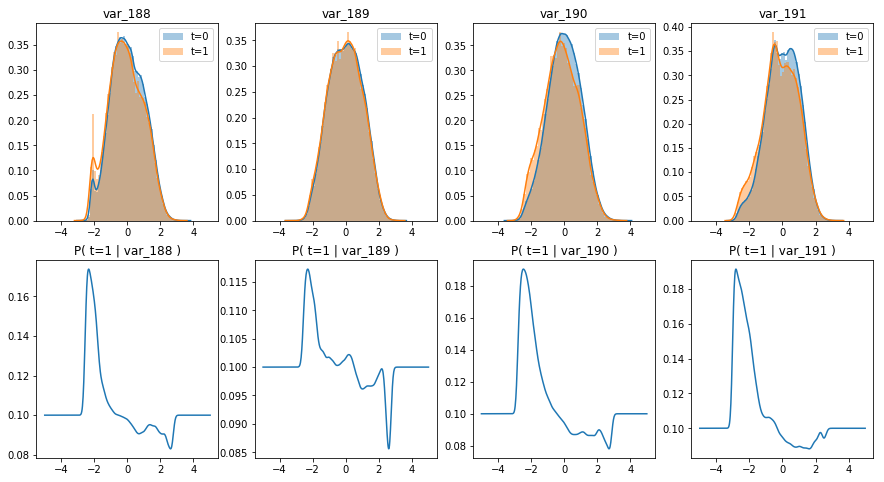

Showing vars 192 to 199 ...


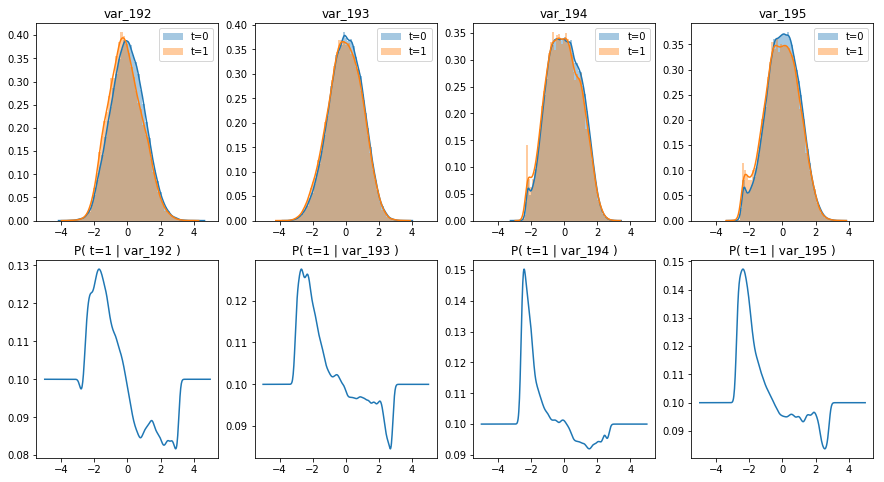

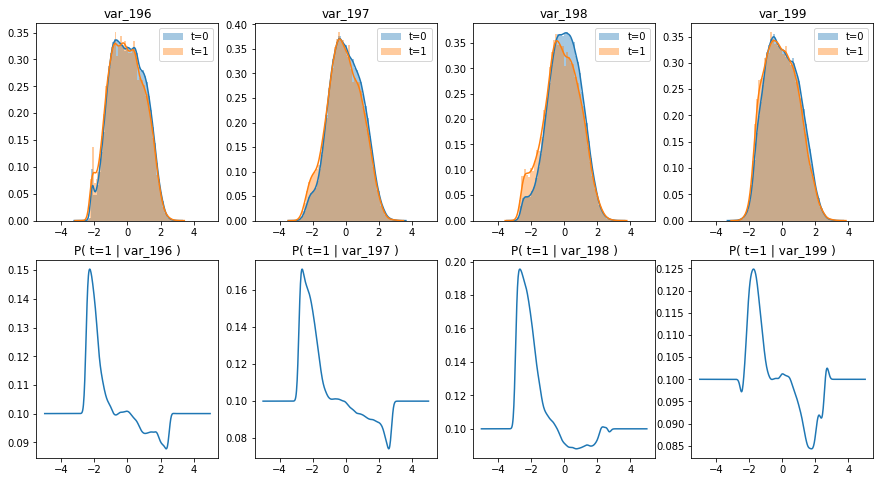

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# DRAW PLOTS, YES OR NO
Picture = True
# DATA HAS Z-SCORE RANGE OF -4.5 TO 4.5
rmin=-5; rmax=5; 
# CALCULATE PROBABILITIES FOR 501 BINS
res=501
# STORE PROBABILITIES IN PR
pr = 0.1 * np.ones((200,res))
pr2 = pr.copy()
xr = np.zeros((200,res))
xr2 = xr.copy()
ct2 = 0
for j in range(50):
    if Picture: plt.figure(figsize=(15,8))
    for v in range(4):
        ct = 0
        # CALCULATE PROBABILITY FUNCTION FOR VAR
        for i in np.linspace(rmin,rmax,res):
            pr[v+4*j,ct] = getp(v+4*j,m[v+4*j]+i*s[v+4*j])
            xr[v+4*j,ct] = m[v+4*j]+i*s[v+4*j]
            xr2[v+4*j,ct] = i
            ct += 1
        if Picture:
            # SMOOTH FUNCTION FOR PRETTIER DISPLAY
            # BUT USE UNSMOOTHED FUNCTION FOR PREDICTION
            pr2[v+4*j,:] = smooth(pr[v+4*j,:],res//10)
            # DISPLAY PROBABILITY FUNCTION
            plt.subplot(2, 4, ct2%4+5)
            plt.plot(xr[v+4*j,:],pr2[v+4*j,:],'-')
            plt.title('P( t=1 | var_'+str(v+4*j)+' )')
            xx = plt.xlim()
            # DISPLAY TARGET DENSITIES
            plt.subplot(2, 4, ct2%4+1)            
            sns.distplot(train0['var_'+str(v+4*j)], label = 't=0')
            sns.distplot(train1['var_'+str(v+4*j)], label = 't=1')
            plt.title('var_'+str(v+4*j))
            plt.legend()
            plt.xlim(xx)
            plt.xlabel('')
        if (ct2%8==0): print('Showing vars',ct2,'to',ct2+7,'...')
        ct2 += 1
    if Picture: plt.show()

# Afterthoughts
These does not look random. I have not tried to go beyond this, Yet, if it works, don't forget to say thanks to Chris Deotte.